In [1]:
import numpy as np
import matplotlib.pyplot as plt

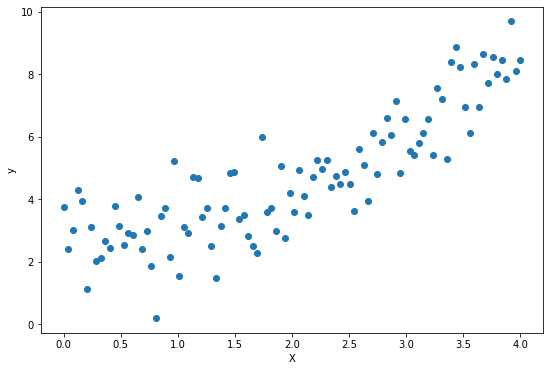

In [15]:
np.random.seed(0)

m = 100
X = np.linspace(0, 4, m).reshape(m, 1)
y = 2 + X**1.3 + np.random.randn(m, 1)

plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

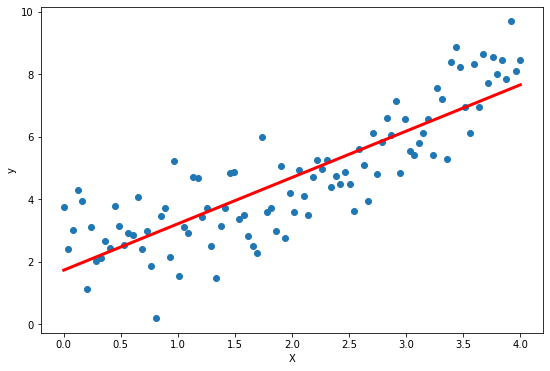

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y, y_pred))

1.1678657785296143


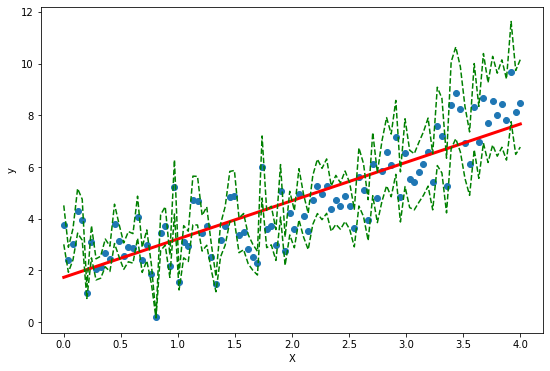

In [17]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)
plt.plot(X, y + 0.2*y, c='g', ls='--')
plt.plot(X, y - 0.2*y, c='g', ls='--')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [47]:
def custom_metric(y, y_pred):
    return np.sum((y_pred < y + y*0.2) & (y_pred > y - 0.2*y))/y.size

In [59]:
custom_metric(y, y_pred)

26.63

In [50]:
from sklearn.metrics import make_scorer

custom_scorer = make_scorer(custom_metric, greater_is_better=True )

In [52]:
from sklearn.model_selection import cross_val_score, GridSearchCV

cross_val_score(LinearRegression(), X, y, cv=3, scoring=custom_scorer)

array([0.08823529, 0.42424242, 0.3030303 ])

In [54]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', degree=3)

params = {'gamma': np.arange(0.01, 1, 0.05)}

grid  = GridSearchCV(model, param_grid= params, cv=3, scoring=custom_scorer)
grid.fit(X,y.ravel())

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'gamma': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96])},
             scoring=make_scorer(custom_metric))

In [55]:
best_model = grid.best_estimator_

26.63


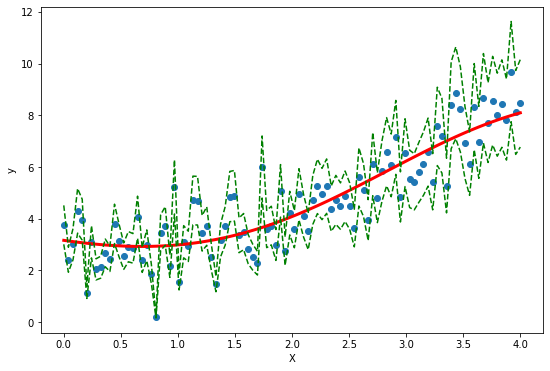

In [58]:
y_pred = best_model.predict(X)
print(custom_metric(y, y_pred))

plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)
plt.plot(X, y + 0.2*y, c='g', ls='--')
plt.plot(X, y - 0.2*y, c='g', ls='--')
plt.xlabel('X')
plt.ylabel('y')
plt.show()